In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pingouin as pg
import scipy
import pylab
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

In [2]:
data=pd.read_excel('35855730-state-marriage-rates-90-95-99-19.xlsx',header=5)
data

,Unnamed: 0,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,2006,2005,2004,2003,2002,2001,2000,1999,1995,1990
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,6.697687,6.760408,7.047340,7.147821,7.351544,7.806776,7.817785,8.2,8.4,...,9.2,9.2,9.4,9.6,9.9,9.4,10.1,10.8,9.8,10.6
2,Alaska,6.512245,6.683952,6.914078,7.103441,7.407588,7.508836,7.293928,7.2,7.8,...,8.2,8.2,8.5,8.1,8.3,8.1,8.9,8.6,9.0,10.2
3,Arizona,5.302995,5.534434,5.834867,5.930541,5.922469,5.780449,5.401091,5.6,5.7,...,6.5,6.6,6.7,6.5,6.7,7.6,7.5,8.2,8.8,10.0
4,Arkansas,8.377284,8.863156,9.456845,9.860962,10.040279,10.112026,9.751052,10.9,10.4,...,12.4,12.9,13.4,13.4,14.3,14.3,15.4,14.8,14.4,15.3
5,California 1,5.723191,6.035132,6.278250,6.463590,6.184957,6.441492,6.460467,6.0,5.8,...,6.3,6.4,6.4,6.1,6.2,6.5,5.8,6.4,6.3,7.9
6,Colorado,7.273297,7.585728,7.333845,7.425443,6.791807,7.061603,6.452664,6.8,7.0,...,7.2,7.6,7.4,7.8,8,8.2,8.3,8.2,9.0,9.8
7,Connecticut,5.048401,5.278133,5.553784,5.617858,5.292009,5.368845,5.021023,5.2,5.5,...,5.5,5.8,5.8,5.5,5.7,5.4,5.7,5.8,6.6,7.9
8,Delaware,4.951919,5.237957,5.528417,5.613062,5.712872,6.022783,6.571976,5.8,5.2,...,5.9,5.9,6.1,6,6.4,6.5,6.5,6.7,7.3,8.4
9,District of Columbia,7.773302,7.835377,8.239526,8.149214,8.220425,11.821343,10.791261,8.4,8.7,...,4,4.1,5.2,5.1,5.1,6.2,4.9,6.6,6.1,8.2


In [3]:
data.drop([0,52,53,54,55,56,57],axis=0, inplace=True)
data

,Unnamed: 0,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,2006,2005,2004,2003,2002,2001,2000,1999,1995,1990
1,Alabama,6.697687,6.760408,7.047340,7.147821,7.351544,7.806776,7.817785,8.2,8.4,...,9.2,9.2,9.4,9.6,9.9,9.4,10.1,10.8,9.8,10.6
2,Alaska,6.512245,6.683952,6.914078,7.103441,7.407588,7.508836,7.293928,7.2,7.8,...,8.2,8.2,8.5,8.1,8.3,8.1,8.9,8.6,9.0,10.2
3,Arizona,5.302995,5.534434,5.834867,5.930541,5.922469,5.780449,5.401091,5.6,5.7,...,6.5,6.6,6.7,6.5,6.7,7.6,7.5,8.2,8.8,10.0
4,Arkansas,8.377284,8.863156,9.456845,9.860962,10.040279,10.112026,9.751052,10.9,10.4,...,12.4,12.9,13.4,13.4,14.3,14.3,15.4,14.8,14.4,15.3
5,California 1,5.723191,6.035132,6.278250,6.463590,6.184957,6.441492,6.460467,6.0,5.8,...,6.3,6.4,6.4,6.1,6.2,6.5,5.8,6.4,6.3,7.9
6,Colorado,7.273297,7.585728,7.333845,7.425443,6.791807,7.061603,6.452664,6.8,7.0,...,7.2,7.6,7.4,7.8,8,8.2,8.3,8.2,9.0,9.8
7,Connecticut,5.048401,5.278133,5.553784,5.617858,5.292009,5.368845,5.021023,5.2,5.5,...,5.5,5.8,5.8,5.5,5.7,5.4,5.7,5.8,6.6,7.9
8,Delaware,4.951919,5.237957,5.528417,5.613062,5.712872,6.022783,6.571976,5.8,5.2,...,5.9,5.9,6.1,6,6.4,6.5,6.5,6.7,7.3,8.4
9,District of Columbia,7.773302,7.835377,8.239526,8.149214,8.220425,11.821343,10.791261,8.4,8.7,...,4,4.1,5.2,5.1,5.1,6.2,4.9,6.6,6.1,8.2
10,Florida,7.070065,7.332063,7.806895,8.125967,8.234362,7.301404,7.009614,7.2,7.4,...,8.6,8.9,9.0,9,9.4,9.3,8.9,8.7,9.9,10.9


In [4]:
data=data.replace({'---':np.nan})
data

,Unnamed: 0,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,2006,2005,2004,2003,2002,2001,2000,1999,1995,1990
1,Alabama,6.697687,6.760408,7.047340,7.147821,7.351544,7.806776,7.817785,8.2,8.4,...,9.2,9.2,9.4,9.6,9.9,9.4,10.1,10.8,9.8,10.6
2,Alaska,6.512245,6.683952,6.914078,7.103441,7.407588,7.508836,7.293928,7.2,7.8,...,8.2,8.2,8.5,8.1,8.3,8.1,8.9,8.6,9.0,10.2
3,Arizona,5.302995,5.534434,5.834867,5.930541,5.922469,5.780449,5.401091,5.6,5.7,...,6.5,6.6,6.7,6.5,6.7,7.6,7.5,8.2,8.8,10.0
4,Arkansas,8.377284,8.863156,9.456845,9.860962,10.040279,10.112026,9.751052,10.9,10.4,...,12.4,12.9,13.4,13.4,14.3,14.3,15.4,14.8,14.4,15.3
5,California 1,5.723191,6.035132,6.278250,6.463590,6.184957,6.441492,6.460467,6.0,5.8,...,6.3,6.4,6.4,6.1,6.2,6.5,5.8,6.4,6.3,7.9
6,Colorado,7.273297,7.585728,7.333845,7.425443,6.791807,7.061603,6.452664,6.8,7.0,...,7.2,7.6,7.4,7.8,8.0,8.2,8.3,8.2,9.0,9.8
7,Connecticut,5.048401,5.278133,5.553784,5.617858,5.292009,5.368845,5.021023,5.2,5.5,...,5.5,5.8,5.8,5.5,5.7,5.4,5.7,5.8,6.6,7.9
8,Delaware,4.951919,5.237957,5.528417,5.613062,5.712872,6.022783,6.571976,5.8,5.2,...,5.9,5.9,6.1,6.0,6.4,6.5,6.5,6.7,7.3,8.4
9,District of Columbia,7.773302,7.835377,8.239526,8.149214,8.220425,11.821343,10.791261,8.4,8.7,...,4.0,4.1,5.2,5.1,5.1,6.2,4.9,6.6,6.1,8.2
10,Florida,7.070065,7.332063,7.806895,8.125967,8.234362,7.301404,7.009614,7.2,7.4,...,8.6,8.9,9.0,9.0,9.4,9.3,8.9,8.7,9.9,10.9


In [5]:
data.fillna(data.median(axis=0,numeric_only=True), inplace=True)
data

,Unnamed: 0,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,2006,2005,2004,2003,2002,2001,2000,1999,1995,1990
1,Alabama,6.697687,6.760408,7.047340,7.147821,7.351544,7.806776,7.817785,8.2,8.4,...,9.2,9.2,9.4,9.6,9.9,9.4,10.10,10.8,9.8,10.6
2,Alaska,6.512245,6.683952,6.914078,7.103441,7.407588,7.508836,7.293928,7.2,7.8,...,8.2,8.2,8.5,8.1,8.3,8.1,8.90,8.6,9.0,10.2
3,Arizona,5.302995,5.534434,5.834867,5.930541,5.922469,5.780449,5.401091,5.6,5.7,...,6.5,6.6,6.7,6.5,6.7,7.6,7.50,8.2,8.8,10.0
4,Arkansas,8.377284,8.863156,9.456845,9.860962,10.040279,10.112026,9.751052,10.9,10.4,...,12.4,12.9,13.4,13.4,14.3,14.3,15.40,14.8,14.4,15.3
5,California 1,5.723191,6.035132,6.278250,6.463590,6.184957,6.441492,6.460467,6.0,5.8,...,6.3,6.4,6.4,6.1,6.2,6.5,5.80,6.4,6.3,7.9
6,Colorado,7.273297,7.585728,7.333845,7.425443,6.791807,7.061603,6.452664,6.8,7.0,...,7.2,7.6,7.4,7.8,8.0,8.2,8.30,8.2,9.0,9.8
7,Connecticut,5.048401,5.278133,5.553784,5.617858,5.292009,5.368845,5.021023,5.2,5.5,...,5.5,5.8,5.8,5.5,5.7,5.4,5.70,5.8,6.6,7.9
8,Delaware,4.951919,5.237957,5.528417,5.613062,5.712872,6.022783,6.571976,5.8,5.2,...,5.9,5.9,6.1,6.0,6.4,6.5,6.50,6.7,7.3,8.4
9,District of Columbia,7.773302,7.835377,8.239526,8.149214,8.220425,11.821343,10.791261,8.4,8.7,...,4.0,4.1,5.2,5.1,5.1,6.2,4.90,6.6,6.1,8.2
10,Florida,7.070065,7.332063,7.806895,8.125967,8.234362,7.301404,7.009614,7.2,7.4,...,8.6,8.9,9.0,9.0,9.4,9.3,8.90,8.7,9.9,10.9


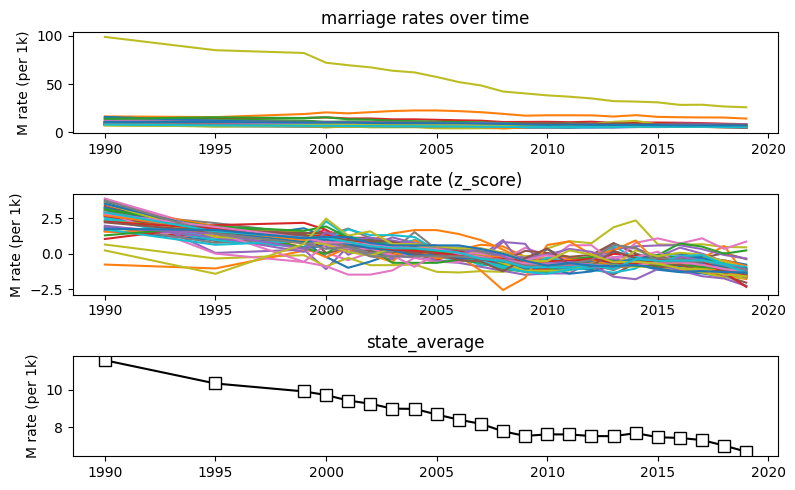

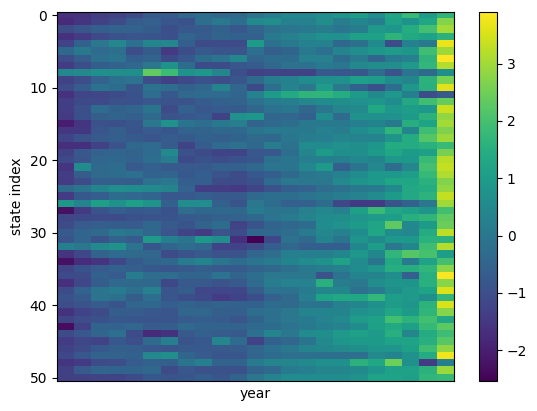

In [24]:
yearM=data.columns[1:].to_numpy().astype(float)
yearM
statesM=data.iloc[:,0]
statesM
M=data.iloc[:,1:].to_numpy()
fig,ax=plt.subplots(3,1,figsize=(8,5))
ax[0].plot(yearM,M.T)
ax[0].set_ylabel('M rate (per 1k)')
ax[0].set_title('marriage rates over time')
ax[1].plot(yearM,stats.zscore(M.T))
ax[1].set_ylabel('M rate (per 1k)')
ax[1].set_title('marriage rate (z_score)')
ax[2].plot(yearM,np.mean(M,axis=0),'ks-',markerfacecolor='w',markersize=8)
ax[2].set_ylabel('M rate (per 1k)')
ax[2].set_title('state_average')
plt.tight_layout()
plt.show()
plt.imshow(stats.zscore(M,axis=1),aspect='auto')
plt.xticks([])
plt.xlabel('year')
plt.ylabel('state index')
plt.colorbar()
plt.show()

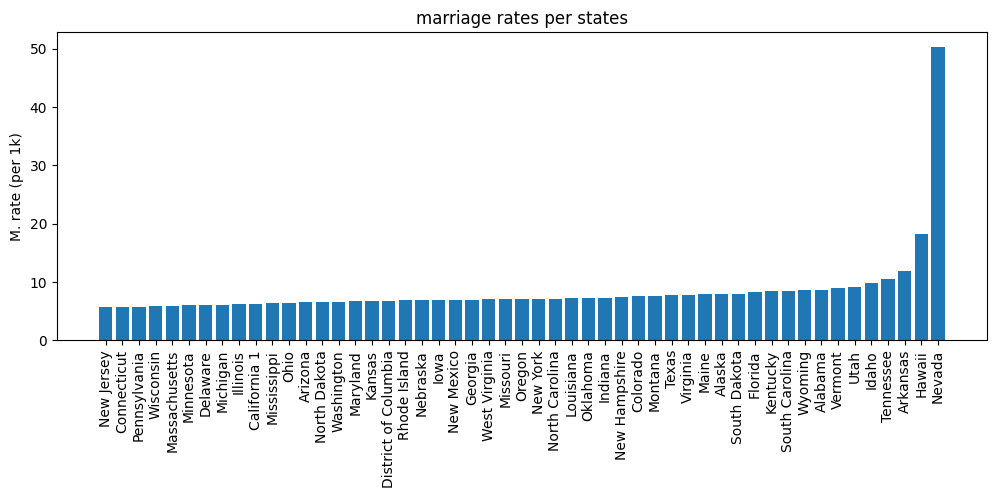

In [33]:
meanMarriageRate=np.mean(M,axis=1)
sidxM=np.argsort(meanMarriageRate)
fig=plt.figure(figsize=(12,4))
plt.bar(statesM.iloc[sidxM], meanMarriageRate[sidxM])
plt.xticks(rotation=90)
plt.ylabel('M. rate (per 1k)')
plt.title('marriage rates per states')
plt.show()

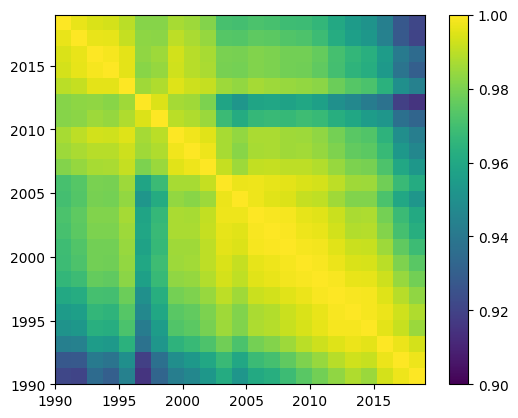

In [46]:
plt.imshow(np.corrcoef(M.T),vmin=0.9,vmax=1,extent=[yearM[-1], yearM[0], yearM[-1], yearM[0]] )
plt.colorbar()

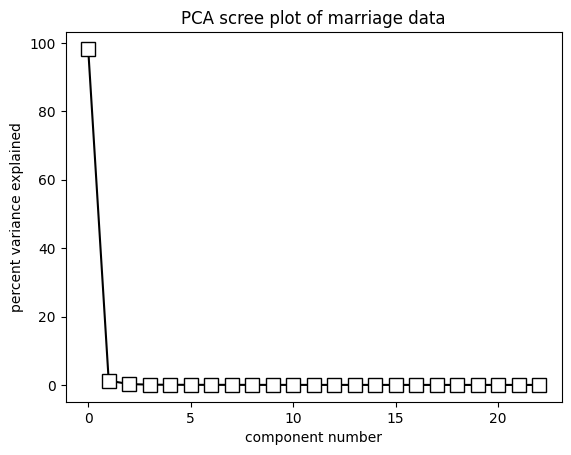

In [49]:
pca=PCA().fit(M)
plt.plot(100*pca.explained_variance_ratio_,'ks-',markerfacecolor='w',markersize=10)
plt.ylabel('percent variance explained')
plt.xlabel('component number')
plt.title('PCA scree plot of marriage data')
plt.show()

In [55]:
data=pd.read_excel('35855734-state-divorce-rates-90-95-99-19.xlsx',header=5)
data.drop([0,52,53,54,55,56,57],axis=0,inplace=True)
data=data.replace({'---':np.nan})
data.fillna(data.median(axis=0,numeric_only=True), inplace=True)
yearD=data.columns[1:].to_numpy().astype(float)
statesD=data.iloc[:,0]
D=data.iloc[:,1:].to_numpy()


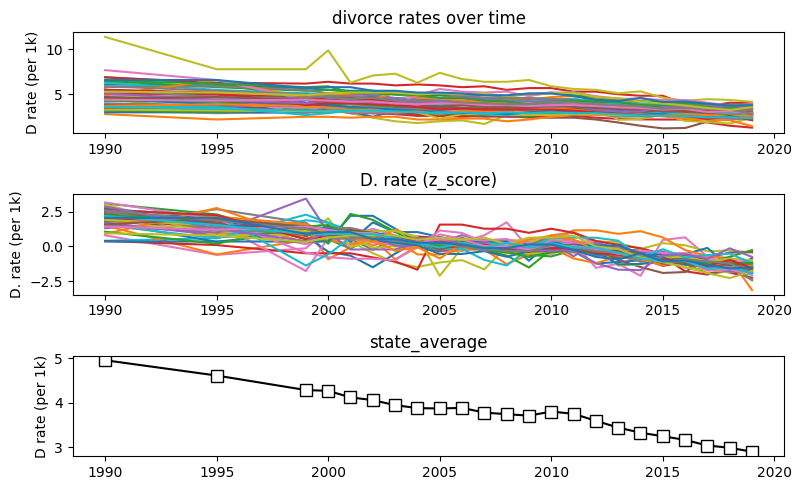

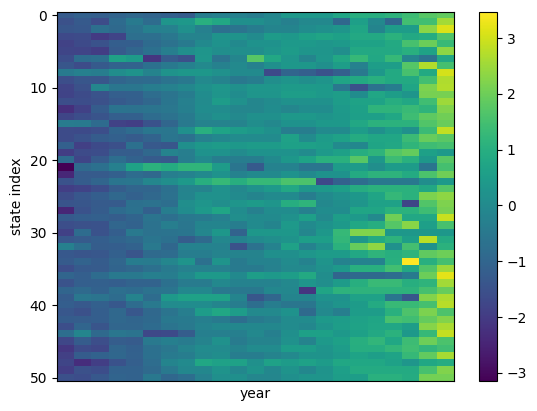

In [56]:
fig,ax=plt.subplots(3,1,figsize=(8,5))
ax[0].plot(yearD,D.T)
ax[0].set_ylabel('D rate (per 1k)')
ax[0].set_title('divorce rates over time')
ax[1].plot(yearM,stats.zscore(D.T))
ax[1].set_ylabel('D. rate (per 1k)')
ax[1].set_title('D. rate (z_score)')
ax[2].plot(yearD,np.mean(D,axis=0),'ks-',markerfacecolor='w',markersize=8)
ax[2].set_ylabel('D rate (per 1k)')
ax[2].set_title('state_average')
plt.tight_layout()
plt.show()
plt.imshow(stats.zscore(D,axis=1),aspect='auto')
plt.xticks([])
plt.xlabel('year')
plt.ylabel('state index')
plt.colorbar()
plt.show()

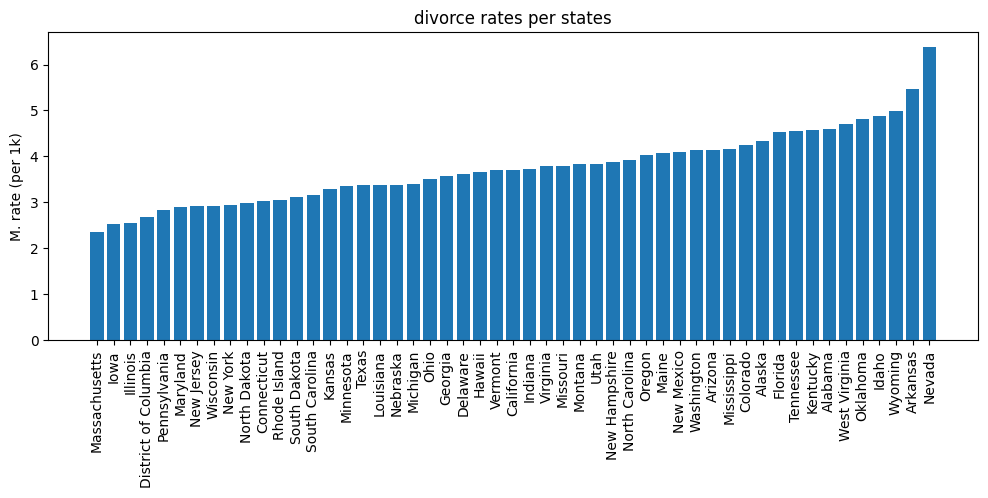

In [58]:
meanDivorceRate=np.mean(D,axis=1)
sidxD=np.argsort(meanDivorceRate)
fig=plt.figure(figsize=(12,4))
plt.bar(statesD.iloc[sidxD], meanDivorceRate[sidxD])
plt.xticks(rotation=90)
plt.ylabel('M. rate (per 1k)')
plt.title('divorce rates per states')
plt.show()

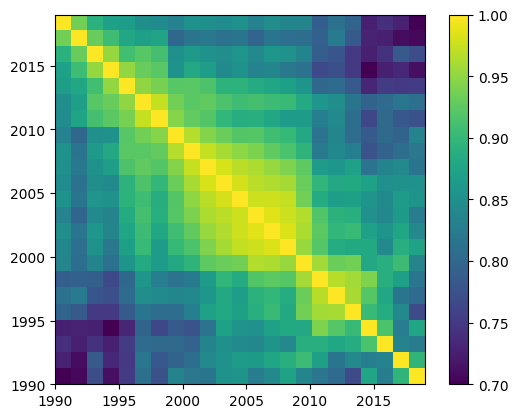

In [61]:
plt.imshow(np.corrcoef(D.T),vmin=0.7,vmax=1,extent=[yearD[-1], yearD[0], yearD[-1], yearD[0]] )
plt.colorbar()
plt.show()

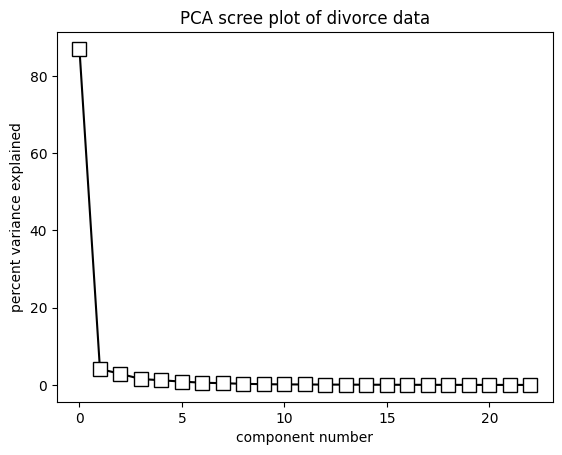

In [60]:
pca=PCA().fit(D)
plt.plot(100*pca.explained_variance_ratio_,'ks-',markerfacecolor='w',markersize=10)
plt.ylabel('percent variance explained')
plt.xlabel('component number')
plt.title('PCA scree plot of divorce data')
plt.show()

In [71]:
print('Comparison of year vectors: ')
print(np.sum(yearD-yearM))
print('')
print('comparison of states vecotrs: ')
print(statesD.equals(statesM))
tmpstatesnames=pd.concat([statesM,statesD],axis=1)
print(tmpstatesnames)
np.where(tmpstatesnames.iloc[:,0]!=tmpstatesnames.iloc[:,1])

Comparison of year vectors: 
0.0

comparison of states vecotrs: 
True
              Unnamed: 0            Unnamed: 0
1                Alabama               Alabama
2                 Alaska                Alaska
3                Arizona               Arizona
4               Arkansas              Arkansas
5             California            California
6               Colorado              Colorado
7            Connecticut           Connecticut
8               Delaware              Delaware
9   District of Columbia  District of Columbia
10               Florida               Florida
11               Georgia               Georgia
12                Hawaii                Hawaii
13                 Idaho                 Idaho
14              Illinois              Illinois
15               Indiana               Indiana
16                  Iowa                  Iowa
17                Kansas                Kansas
18              Kentucky              Kentucky
19             Louisiana             

(array([], dtype=int64),)

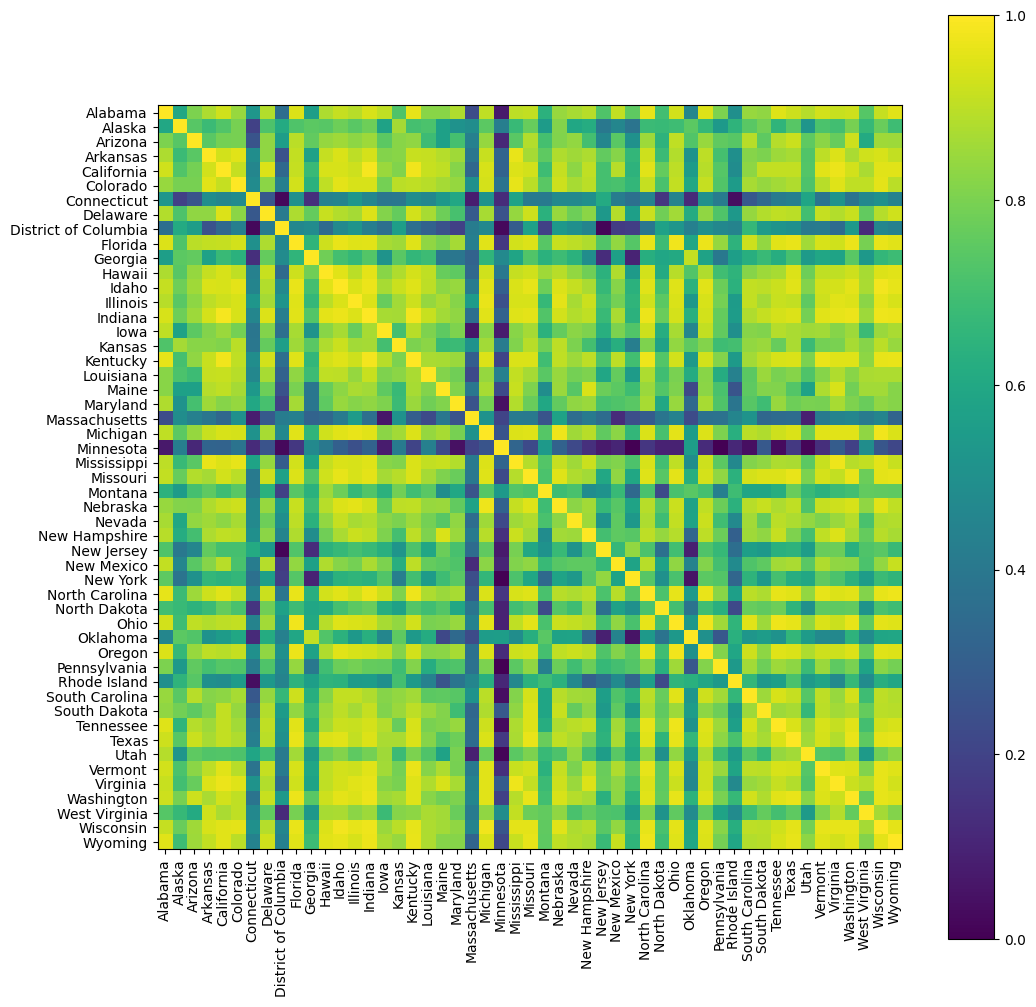

In [77]:
fig=plt.figure(figsize=(12,12))
plt.imshow(np.corrcoef(D),vmin=0,vmax=1)
plt.xticks(ticks=range(len(statesD)),labels=statesD,rotation=90)
plt.yticks(ticks=range(len(statesD)),labels=statesD)
plt.colorbar()

plt.show()

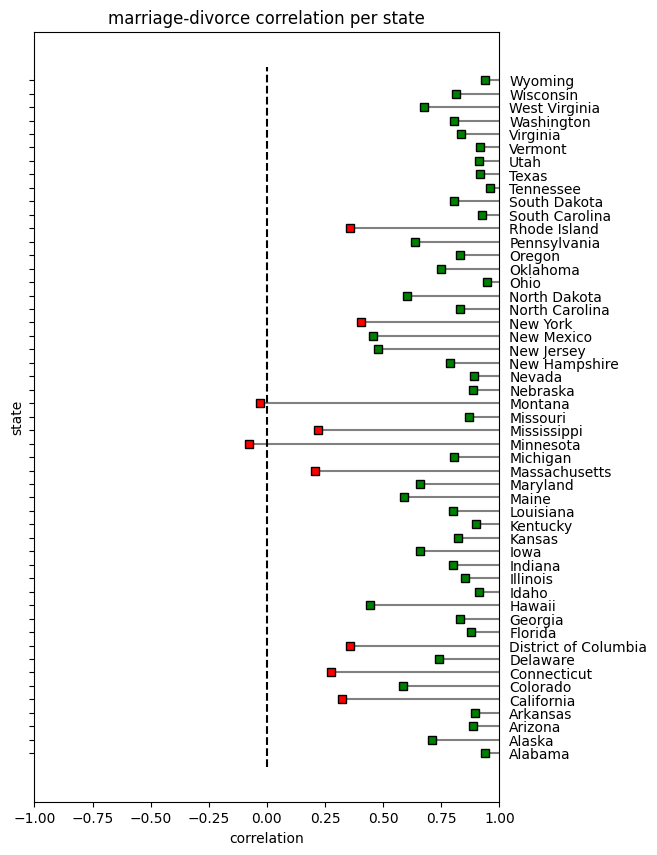

In [88]:
pvalTreshold=0.05
fig=plt.figure(figsize=(6,10))
color='rg'
for si in range(len(statesM)):
    r,p=stats.pearsonr(M[si,:],D[si,:])
    plt.plot([r,1],[si,si],'-',color=[.5,0.5,0.5])
    plt.plot(r,si,'ks',si,markerfacecolor=color[bool(p<pvalTreshold)])
plt.ylabel('state')
plt.xlabel('correlation')
plt.title('marriage-divorce correlation per state')
plt.yticks(range(len(statesM)), labels=statesM)
plt.tick_params(axis='y', which='both',labelleft=False,labelright=True)
plt.plot([0,0],[-1,51],'k--')
plt.xlim([-1,1])
plt.show()

/tmp/ipykernel_5180/4085068466.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax[1].plot([rowi,rowi],[bM-bD,0],'k-',color=[0.7,0.7,0.7])
/tmp/ipykernel_5180/4085068466.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  ax[1].plot([rowi,rowi],[bM-bD,bM-bD],'ko',color=[0.7,0.7,0.7])


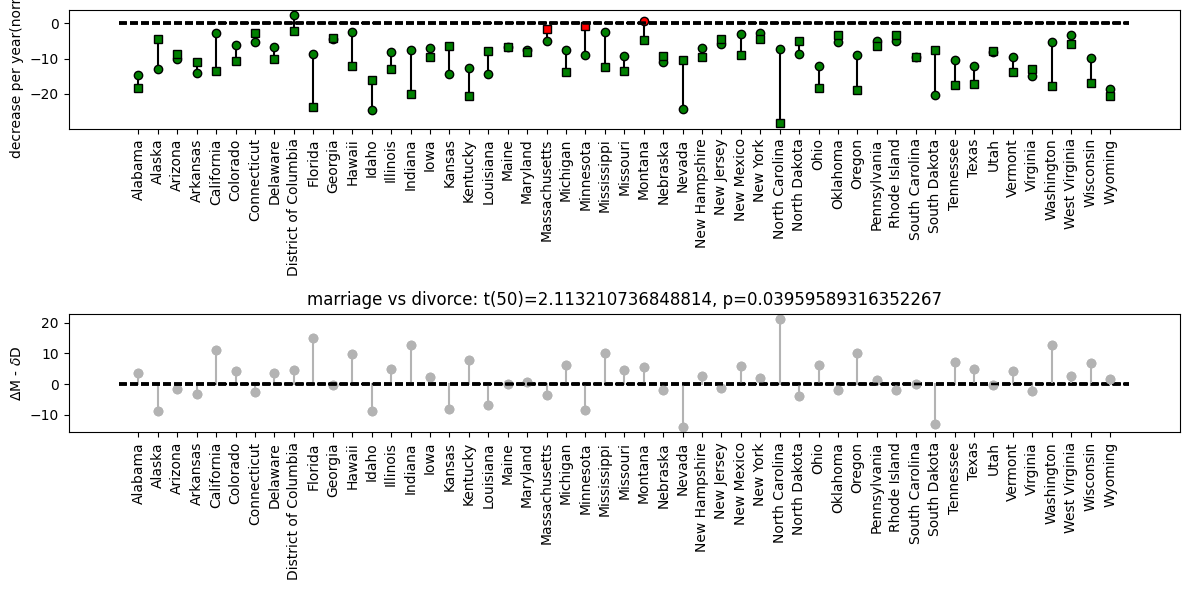

In [100]:
fig,ax=plt.subplots(2,1,figsize=(12,6))
MvsD=np.zeros(len(statesM))
for rowi in range(len(statesM)):
    bM,intercept,rM,pM,seM=stats.linregress(yearM,M[rowi,:])
    bD,intercept,rD,pD,seD=stats.linregress(yearM,D[rowi,:])
    bM=bM/seM
    bD=bD/seD
    ax[0].plot([rowi,rowi],[bM,bD],'k')
    ax[0].plot(rowi,bM,'ko',markerfacecolor=color[bool(pM<pvalTreshold)])
    ax[0].plot(rowi,bD,'ks',markerfacecolor=color[bool(pD<pvalTreshold)])
    ax[0].plot([-1,51], [0,0],'k--')
    ax[1].plot([-1,51], [0,0],'k--')
    
    ax[1].plot([rowi,rowi],[bM-bD,0],'k-',color=[0.7,0.7,0.7])
    ax[1].plot([rowi,rowi],[bM-bD,bM-bD],'ko',color=[0.7,0.7,0.7])
    
    MvsD[rowi]=bM-bD
for i in range(2):
    ax[i].set_xticks(range(51))
    ax[i].set_xticklabels(statesD,rotation=90)
ax[0].set_ylabel('decrease per year(norm.)')
ax[1].set_ylabel('$\Delta$M - $\delta$D')
t,p=stats.ttest_1samp(MvsD,0)
dof=len(MvsD)-1
ax[1].set_title(f'marriage vs divorce: t({dof})={t}, p={p}')



plt.tight_layout() 
    
    
    

In [90]:
stats.linregress(yearD,D[0,:])

LinregressResult(slope=-0.10454950171968055, intercept=214.47900792577332, rvalue=-0.9700245089454967, pvalue=2.216664695809862e-14, stderr=0.005715425660474378, intercept_stderr=11.474168956063835)